# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)    

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data l["country"]ist
        city_data.append({"City": city,
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | allanridge
Processing Record 2 of Set 1 | oyama
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | freetown
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | kavaratti
Processing Record 10 of Set 1 | kargasok
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | amparafaravola
Processing Record 20 of Set 1 | slavyanka
Processing Record 21 of Set 1 | la ronge
Processing Record 22 of Set 1 | kish
Processi

Processing Record 40 of Set 4 | luena
Processing Record 41 of Set 4 | malmberget
Processing Record 42 of Set 4 | fort bragg
Processing Record 43 of Set 4 | nuuk
Processing Record 44 of Set 4 | smithers
Processing Record 45 of Set 4 | kristiansund
Processing Record 46 of Set 4 | daru
Processing Record 47 of Set 4 | luderitz
Processing Record 48 of Set 4 | ust-nera
Processing Record 49 of Set 4 | sodra sandby
Processing Record 0 of Set 5 | martapura
Processing Record 1 of Set 5 | labrador city
Processing Record 2 of Set 5 | napier
Processing Record 3 of Set 5 | eraan
Processing Record 4 of Set 5 | mobaye
Processing Record 5 of Set 5 | bereznik
Processing Record 6 of Set 5 | revda
Processing Record 7 of Set 5 | qaqortoq
Processing Record 8 of Set 5 | gadzhiyevo
Processing Record 9 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 10 of Set 5 | oranjemund
Processing Record 11 of Set 5 | chegdomyn
Processing Record 12 of Set 5 | vingt cinq
City not found. Skipping...
Processi

City not found. Skipping...
Processing Record 35 of Set 8 | alaghsas
Processing Record 36 of Set 8 | childress
Processing Record 37 of Set 8 | mandali
Processing Record 38 of Set 8 | mahanoro
Processing Record 39 of Set 8 | notse
Processing Record 40 of Set 8 | caala
Processing Record 41 of Set 8 | lagos
Processing Record 42 of Set 8 | lamu
Processing Record 43 of Set 8 | qarqaraly
Processing Record 44 of Set 8 | yanqul
Processing Record 45 of Set 8 | white rock
Processing Record 46 of Set 8 | deir ez-zor
Processing Record 47 of Set 8 | chernihiv
Processing Record 48 of Set 8 | vernon
Processing Record 49 of Set 8 | tacuarembo
Processing Record 0 of Set 9 | mil'kovo
Processing Record 1 of Set 9 | chiang saen
Processing Record 2 of Set 9 | port alberni
Processing Record 3 of Set 9 | laguna
Processing Record 4 of Set 9 | vrangel'
Processing Record 5 of Set 9 | oroqen zizhiqi
Processing Record 6 of Set 9 | houghton
Processing Record 7 of Set 9 | vorgashor
Processing Record 8 of Set 9 | ka

Processing Record 22 of Set 12 | hamamatsu
Processing Record 23 of Set 12 | dahanu
Processing Record 24 of Set 12 | kulia village
City not found. Skipping...
Processing Record 25 of Set 12 | wanlaweyn
Processing Record 26 of Set 12 | chui
Processing Record 27 of Set 12 | mucuri
Processing Record 28 of Set 12 | labytnangi
Processing Record 29 of Set 12 | mejit
Processing Record 30 of Set 12 | ilhabela
Processing Record 31 of Set 12 | gettorf
Processing Record 32 of Set 12 | tanguieta
Processing Record 33 of Set 12 | bowen
Processing Record 34 of Set 12 | sassandra
Processing Record 35 of Set 12 | dungarvan
Processing Record 36 of Set 12 | sitangkai
Processing Record 37 of Set 12 | inarajan village
Processing Record 38 of Set 12 | tefe
Processing Record 39 of Set 12 | cranbrook
Processing Record 40 of Set 12 | aktobe
Processing Record 41 of Set 12 | kurtamysh
Processing Record 42 of Set 12 | chonchi
Processing Record 43 of Set 12 | ciudad bolivar
Processing Record 44 of Set 12 | alofi
Pr

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [25]:
# Display sample data
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
city_data_df['Date'] = city_data_df['Date'].dt.strftime('%Y-%m-%d')
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,allanridge,-27.7543,26.6438,47.61,27,0,4.79,ZA,2023-06-19
1,oyama,36.3000,139.8000,79.59,52,72,5.59,JP,2023-06-19
2,college,64.8569,-147.8028,66.52,43,75,10.36,US,2023-06-19
3,bredasdorp,-34.5322,20.0403,55.11,67,75,17.83,ZA,2023-06-19
4,freetown,8.4840,-13.2299,80.31,83,75,6.91,SL,2023-06-19


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,allanridge,-27.7543,26.6438,47.61,27,0,4.79,ZA,2023-06-19
1,oyama,36.3000,139.8000,79.59,52,72,5.59,JP,2023-06-19
2,college,64.8569,-147.8028,66.52,43,75,10.36,US,2023-06-19
3,bredasdorp,-34.5322,20.0403,55.11,67,75,17.83,ZA,2023-06-19
4,freetown,8.4840,-13.2299,80.31,83,75,6.91,SL,2023-06-19


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

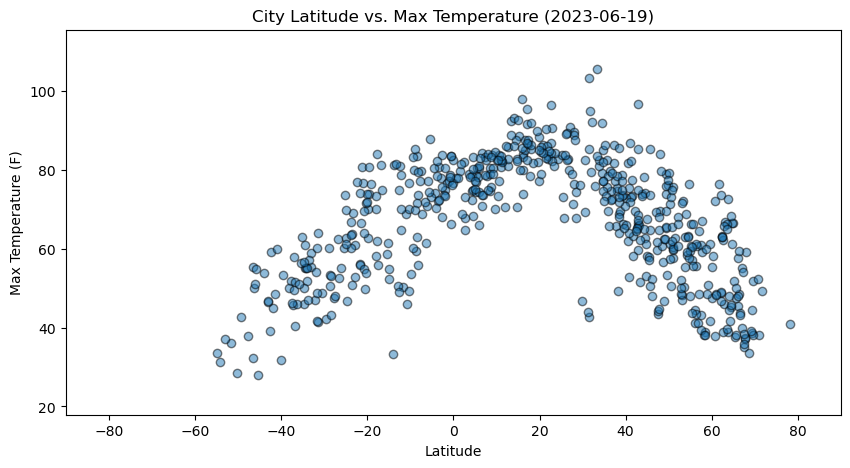

In [41]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,5))

# Incorporate the other graph properties
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (2023-06-19)')
plt.xlim(-90, 90)
plt.ylim(min(city_data_df['Max Temp'])-10, max(city_data_df['Max Temp'])+10)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

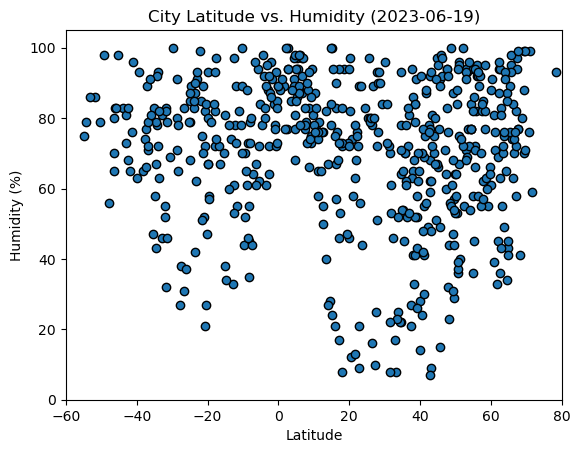

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-06-19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60, 80)
plt.ylim(0, 105)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

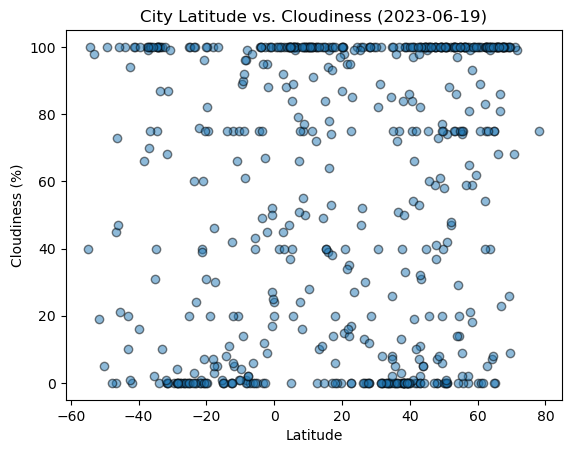

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness (2023-06-19)")
plt.grid=True
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

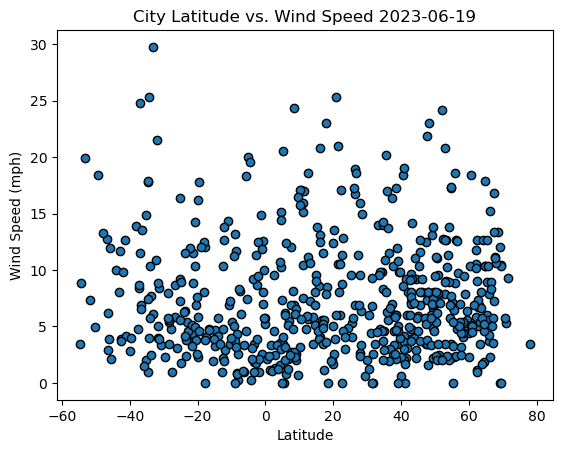

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed 2023-06-19")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_col, y_col):
    slope, intercept, rvalue, pvalue, stderr = linregress(df[x_col], df[y_col])


    plt.scatter(df[x_col], df[y_col])
    plt.plot(df[x_col], intercept + slope*df[x_col], 'r')

    r_squared = rvalue**2
    title = f"{x_col.capitalize()} vs. {y_col.capitalize()} Linear Regression"
    plt.title(title)
               
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    plt.show()
    print(f"R-squared: {r_squared:.2f}")

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,oyama,36.3000,139.8000,79.59,52,72,5.59,JP,2023-06-19
2,college,64.8569,-147.8028,66.52,43,75,10.36,US,2023-06-19
4,freetown,8.4840,-13.2299,80.31,83,75,6.91,SL,2023-06-19
5,yellowknife,62.4560,-114.3525,63.12,36,75,12.66,CA,2023-06-19
7,bethel,41.3712,-73.4140,73.27,75,19,2.21,US,2023-06-19


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,allanridge,-27.7543,26.6438,47.61,27,0,4.79,ZA,2023-06-19
3,bredasdorp,-34.5322,20.0403,55.11,67,75,17.83,ZA,2023-06-19
6,puerto natales,-51.7236,-72.4875,36.19,86,19,7.31,CL,2023-06-19
10,grytviken,-54.2811,-36.5092,31.35,79,100,8.84,GS,2023-06-19
11,adamstown,-25.0660,-130.1015,73.56,79,100,16.33,PN,2023-06-19


###  Temperature vs. Latitude Linear Regression Plot

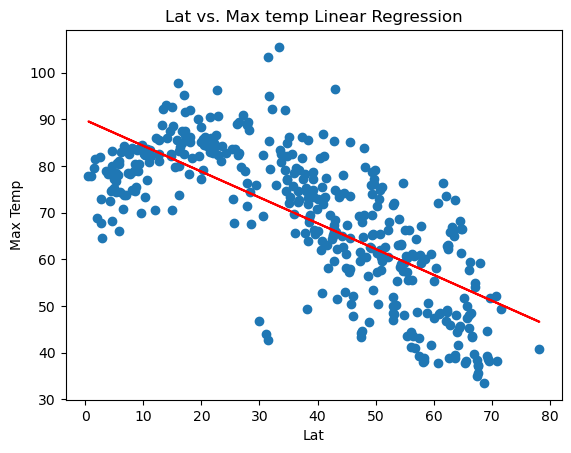

R-squared: 0.53


In [66]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Max Temp')

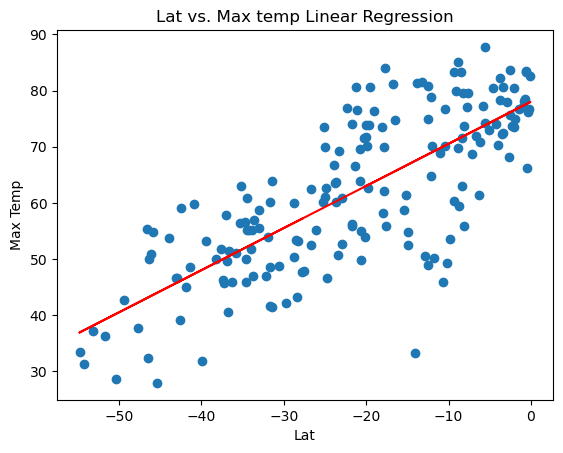

R-squared: 0.58


In [67]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#in the northern hemisphere, as the latitude increases, the max temp decreases. in the southern hemisphere, as latitude increases, the temp increases. there is a moderate correlation between latitude and temperature for both the northern and southern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

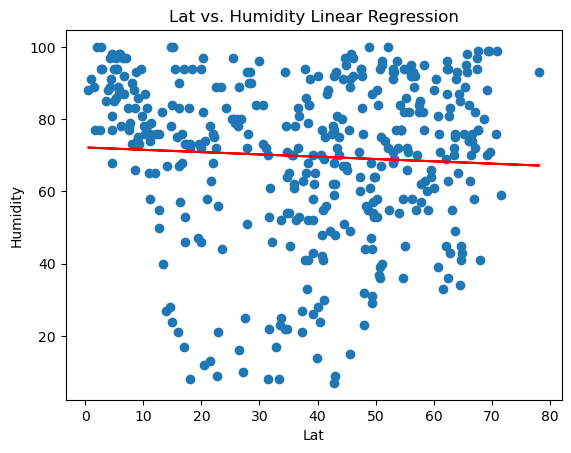

R-squared: 0.00


In [68]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Humidity')

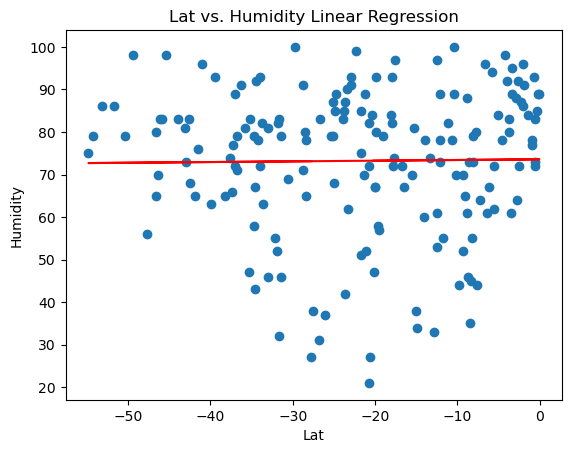

R-squared: 0.00


In [69]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# both the north and south hemispheres shows no correlation between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

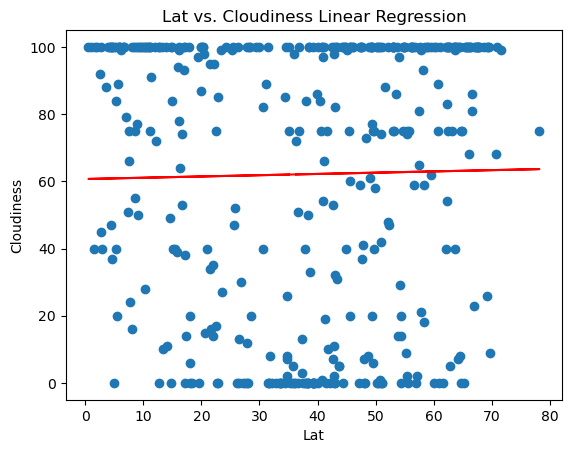

R-squared: 0.00


In [70]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Cloudiness')

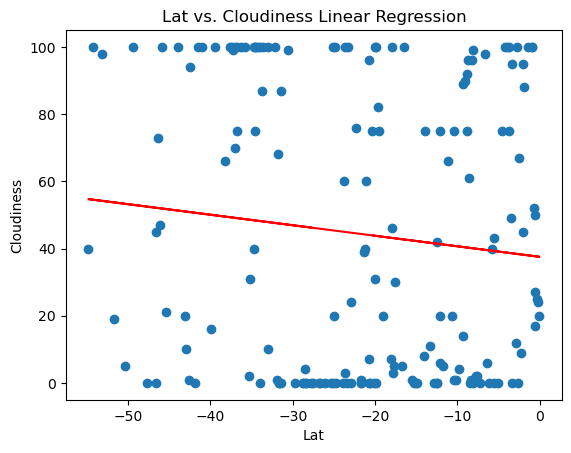

R-squared: 0.01


In [71]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# both the north and south hemispheres shows no correlation between latitude and cloudiness.  the northern hemisphere has a slight positive slope while the southern hemisphere has a slight negative slope. 

### Wind Speed vs. Latitude Linear Regression Plot

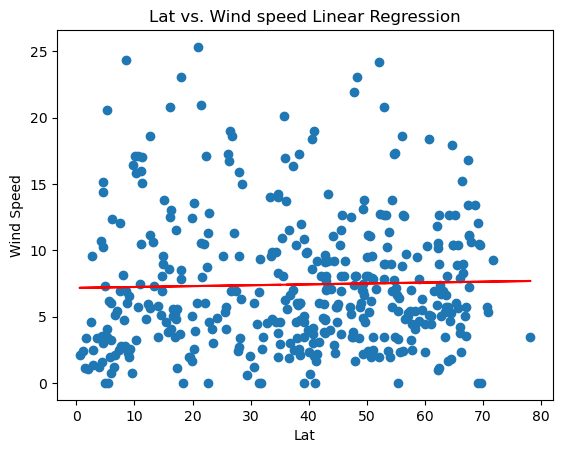

R-squared: 0.00


In [72]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Wind Speed')

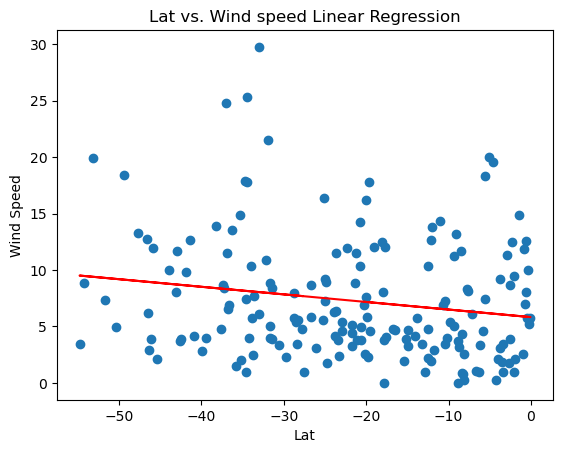

R-squared: 0.03


In [73]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# both the north and south hemispheres shows no correlation between latitude and wind speed. the northern hemisphere has a slight positive slope while the southern hemisphere has a slight negative slope. 